데이터에 관하여

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sport_test.csv',
                index_col = '학생번호')
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [3]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [4]:
df.shape

(10, 5)

## 1차원 데이터의 정리
#### 데이터 중심의 지표

In [5]:
import numpy as np
import pandas as pd

#Jupyter Notebook의 출력을 소수점 이하 3자리로 제한

In [6]:
df = pd.read_csv('../data/scores_em.csv',
           index_col = 'student number')
df.head()
# df의 처음 5행을 표시

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [7]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [8]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                       'F', 'G', 'H', 'I', 'J'],
                                      name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [9]:
sum(scores) / len(scores)

55.0

In [10]:
np.mean(scores)

55.0

In [11]:
scores_df.mean()

score    55.0
dtype: float64

### 중앙값

In [12]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [13]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1)/ 2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [14]:
np.median(scores)

56.5

In [15]:
scores_df.median()

score    56.5
dtype: float64

### 최빈값

In [16]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [17]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 데이터의 산포도 지표

#### 분산과 표준편차

#### 편차

In [18]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [19]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [20]:
np.mean(deviation)

0.0

In [21]:
np.mean(another_deviation)

0.0

In [22]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [23]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

### 분산

In [24]:
np.mean(deviation ** 2)

86.0

In [25]:
np.var(scores)

86.0

In [26]:
scores_df.var()

score    95.555556
dtype: float64

In [27]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [28]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

### 표준편차

In [29]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [30]:
np.std(scores, ddof = 0)

9.273618495495704

### 범위와 4분위수 범위

#### 범위

In [31]:
np.max(scores) - np.min(scores)

28

In [32]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

#### 사분위수 범위

### 데이터의 지표 정리

In [33]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

### 데이터의 정규화

#### 표준화

In [34]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [35]:
np.mean(z), np.std(z, ddof = 0)

(-1.6653345369377347e-17, 0.9999999999999999)

#### 편차값

In [36]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [37]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


### 데이터의 시각화

In [39]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])

# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 도수분포표

In [41]:
freq, _ = np.histogram(english_scores, bins = 10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [42]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range (0, 100, 10)]

# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency' : freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [43]:
class_value = [(i+(i+10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [46]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [47]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [48]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                            'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


### 최빈값 재검토

In [49]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 히스토그램

In [50]:
#Matplotlib의 pyplot 모듈을 plt라는 이름으로 import
import matplotlib.pyplot as plt
%matplotlib inline

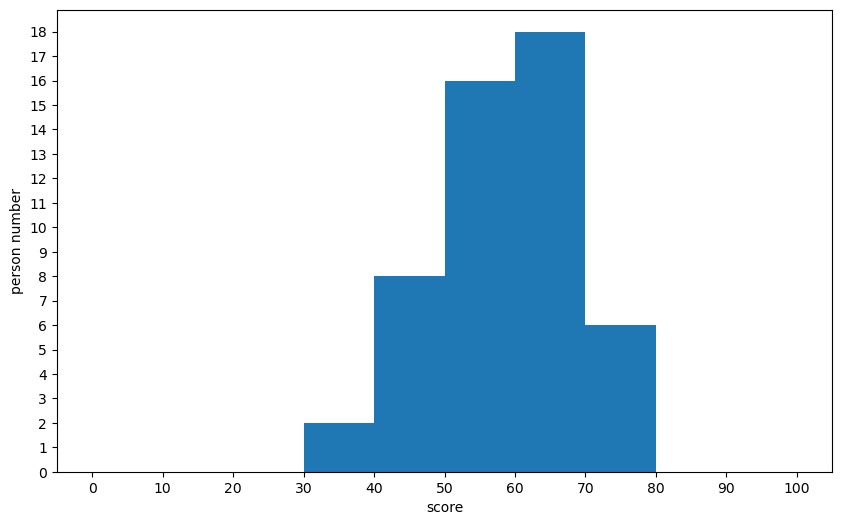

In [57]:
# 캔버스를 생성
# figsize로 가로, 세로 크기를 지정
fig = plt.figure(figsize = (10,6))
# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1 x 1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _ , _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ... 의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max() + 1))
# 그래프 표시
plt.show()

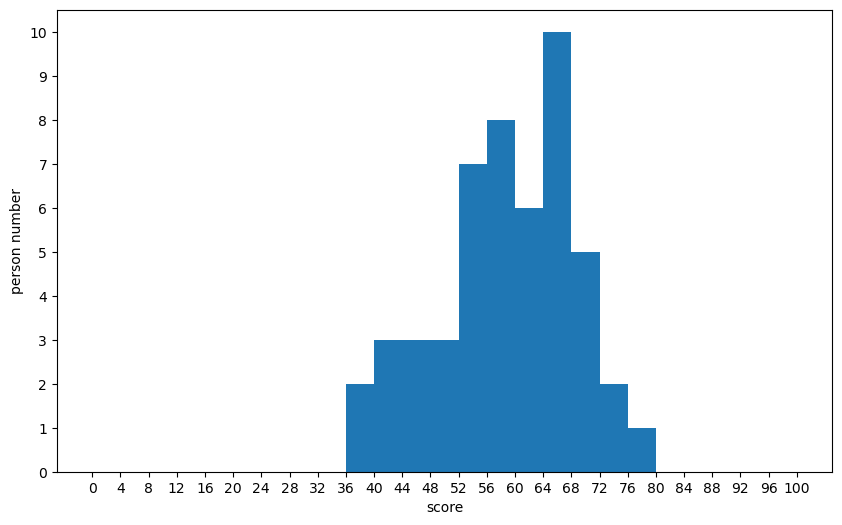

In [55]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max() + 1))
plt.show()

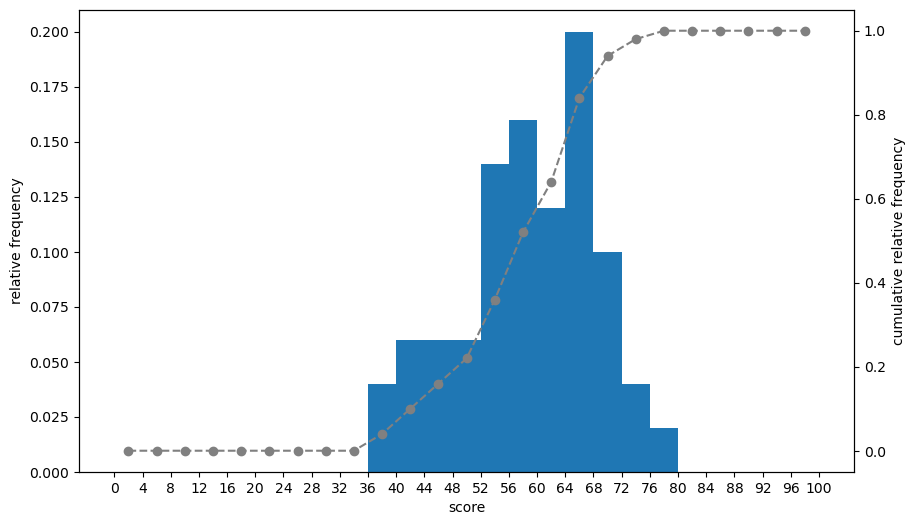

In [59]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins = 25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 Is를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o' 으로 하면 데이터 점을 그림
# 인수 color 를 'gray'로 하면 회색으로 지정

ax2.plot(class_value, cum_rel_freq,
        ls='--', marker='o', color='gray')

# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자 그림

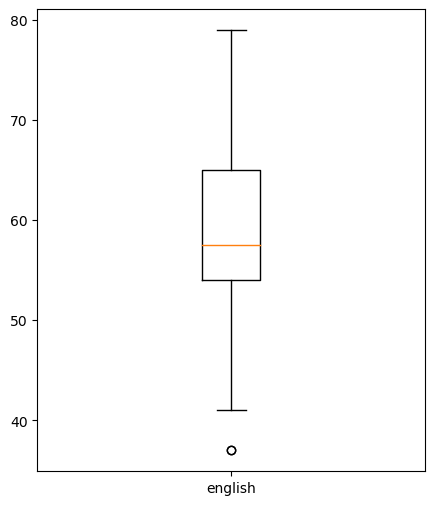

In [60]:
fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()